Anomaly detecting is identifying unexpected events in systems.

Isolation Forest is an anomaly detection algorithm used to identify outliers or anomalies in a dataset.

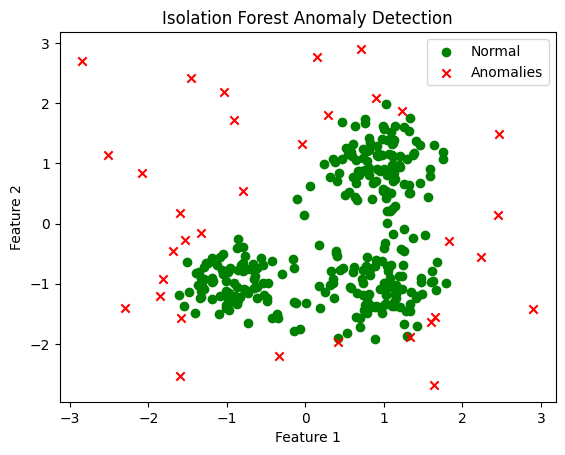

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest

# Generate synthetic data with three blobs and introduce some outliers
X, y = make_blobs(n_samples=300, centers=[[1, 1], [-1, -1], [1, -1]], cluster_std=0.4, random_state=42)
X_outliers = np.random.uniform(low=-3, high=3, size=(30, 2))

# Combine the data with outliers
X_with_outliers = np.vstack((X, X_outliers))

# Apply Isolation Forest
clf = IsolationForest(contamination=0.1, random_state=42)
y_pred = clf.fit_predict(X_with_outliers)

# Plot the data points with outliers flagged as anomalies
plt.scatter(X_with_outliers[y_pred == 1, 0], X_with_outliers[y_pred == 1, 1], c='green', label='Normal')
plt.scatter(X_with_outliers[y_pred == -1, 0], X_with_outliers[y_pred == -1, 1], c='red', marker='x', label='Anomalies')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Isolation Forest Anomaly Detection')
plt.legend()
plt.show()


Example 2

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)

num_dimensions = 2
num_samples = 1000
outlier_ratio = 0.01
num_inliers = int(num_samples * (1-outlier_ratio))
num_outliers = num_samples - num_inliers
x_0 = np.random.randn(num_inliers//3, num_dimensions) - 3
x_1 = np.random.randn(num_inliers//3, num_dimensions)
x_2 = np.random.randn(num_inliers//3, num_dimensions) + 4

# Add outliers sampled from a random uniform distribution
x = np.r_[x_0, x_1, x_2, np.random.uniform(low=-10, high=10, size=(num_outliers, num_dimensions))]

# Generate labels, 1 for inliers and -1 for outliers
labels = np.ones(num_samples, dtype=int)
labels[-num_outliers:] = -1

Applying sklearn.ensemble.IsolationForest


Number of errors: 8


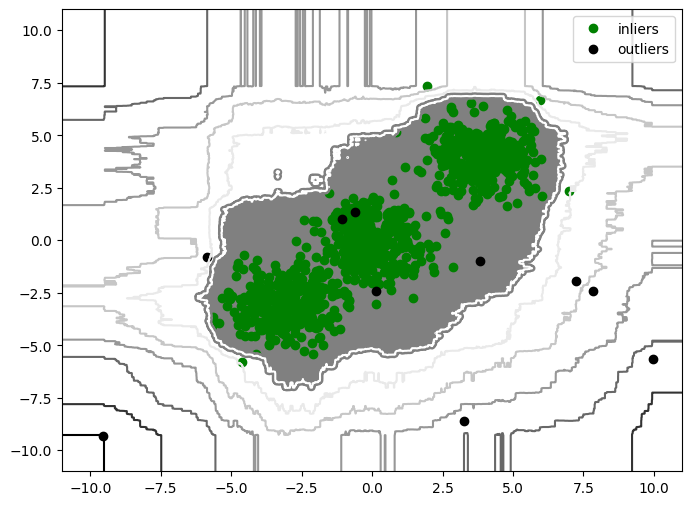

In [3]:
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(99)

classifier = IsolationForest(max_samples=num_samples, contamination=outlier_ratio, random_state=rng)
classifier.fit(x)
y_pred = classifier.predict(x)
num_errors = sum(y_pred != labels)
print('Number of errors: {}'.format(num_errors))

scores_pred = classifier.decision_function(x)
threshold = stats.scoreatpercentile(scores_pred, 100 * outlier_ratio)
xx, yy = np.meshgrid(np.linspace(-11,11,1000), np.linspace(-11,11,1000))
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

inlier_plot = plt.plot(x[:num_inliers,0], x[:num_inliers,1], 'go', label='inliers')
outlier_plot = plt.plot(x[-num_outliers:,0], x[-num_outliers:,1], 'ko', label='outliers')

plt.contour(xx, yy, Z, levels=[threshold],linewidths=5, colors='gray')
plt.contour(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7), cmap=plt.cm.Greys_r)
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='gray')

plt.xlim(-11,11)
plt.ylim(-11,11)
plt.legend(numpoints=1)
plt.show()